In [75]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

The result of the below analysis is this function

In [91]:
# a function to detect bell peppers
def find_bell_pepper(image):
    # blur image slightly
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    # convert to HSV
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    # define range of yellow color in HSV
    min_yel = np.array([10, 150, 150])
    max_yel = np.array([19, 256, 256])
    # Threshold the HSV image to get only yellow colors
    mask_yel = cv2.inRange(image_blur_hsv, min_yel, max_yel)
    # clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_yel_closed = cv2.morphologyEx(mask_yel, cv2.MORPH_CLOSE, kernel)
    mask_yel_closed_then_opened = cv2.morphologyEx(mask_yel_closed, cv2.MORPH_OPEN, kernel)

    # find contours
    contours, _ = cv2.findContours(mask_yel_closed_then_opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # find the biggest contour
    if len(contours) > 0:
        biggest_contour = max(contours, key=cv2.contourArea)
        # find the bounding box of the biggest contour
        x, y, w, h = cv2.boundingRect(biggest_contour)
        # draw the bounding box
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
        # find the center of the bounding box
        center = (int(x+w/2), int(y+h/2))
        # draw the center
        cv2.circle(image, center, 5, (0, 0, 255), -1)
        # return the center
        return center
    else:
        return None

(562, 393)


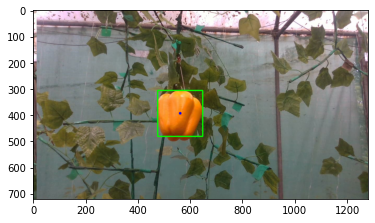

In [95]:
# Try the function on the test image
image = cv2.imread('new3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
center = find_bell_pepper(image)
print(center)
plt.imshow(image)
plt.show()

---

In [76]:
# utility functions
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

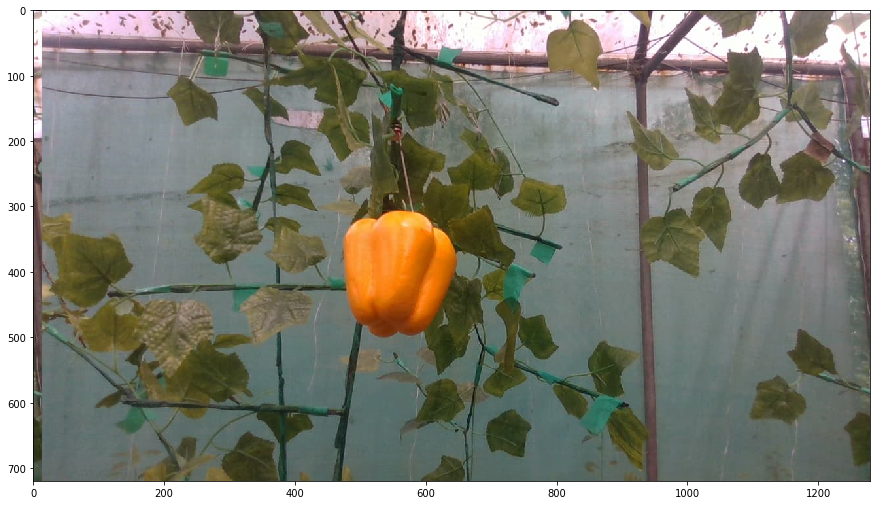

In [77]:
# Read the image
image = cv2.imread('new3.jpg')

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show the image
show(image)

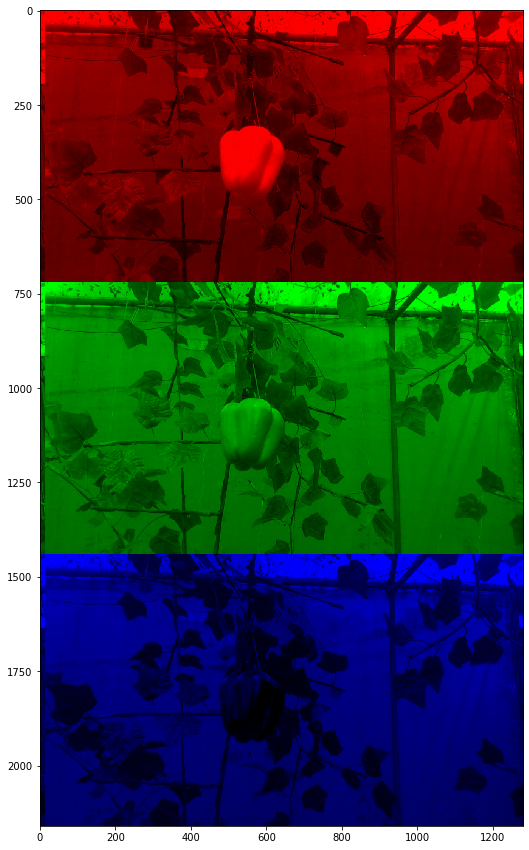

In [78]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

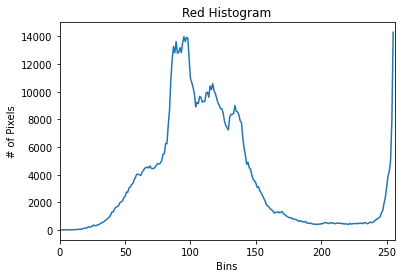

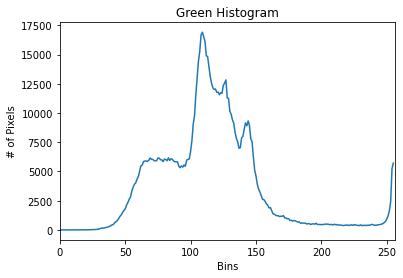

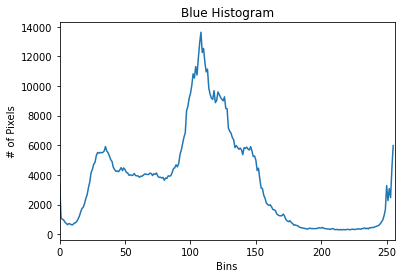

In [79]:
#create a histogram for each color channel
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()
plt.title("Red Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

hist = cv2.calcHist([image], [1], None, [256], [0, 256])
plt.figure()
plt.title("Green Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

hist = cv2.calcHist([image], [2], None, [256], [0, 256])
plt.figure()
plt.title("Blue Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# show the plots
plt.show()

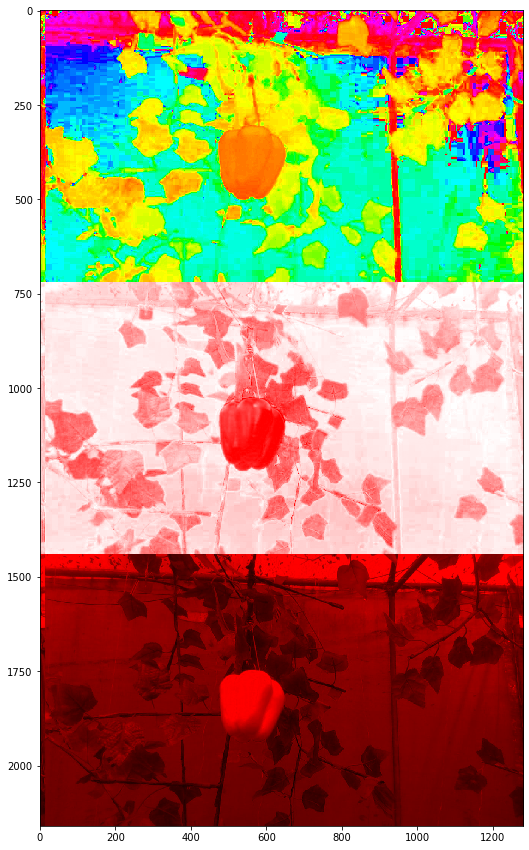

In [80]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

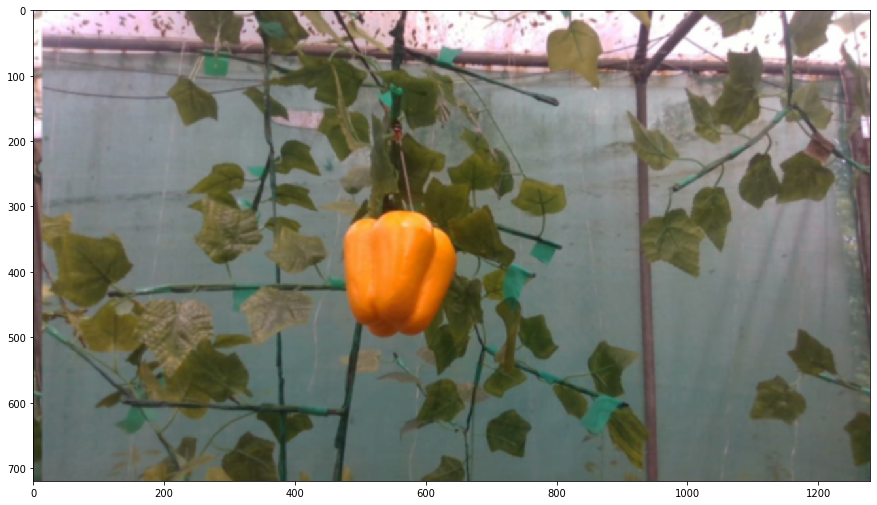

In [81]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

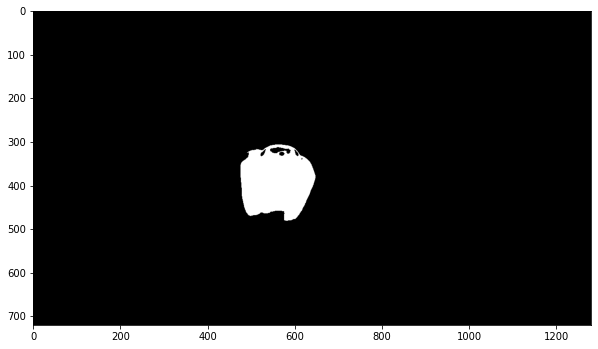

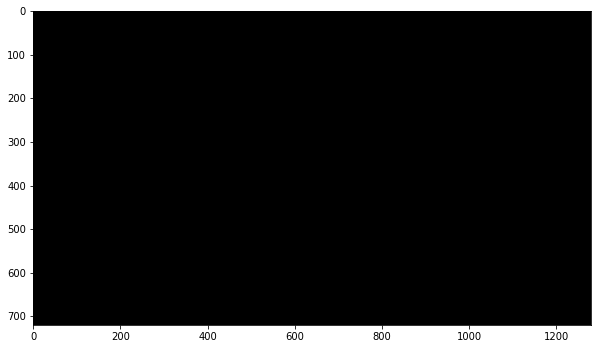

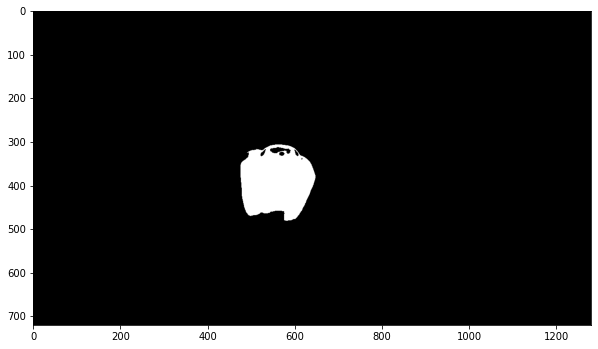

In [82]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_yel = np.array([10, 150, 150])
max_yel = np.array([19, 256, 256])
image_yel1 = cv2.inRange(image_blur_hsv, min_yel, max_yel)

# 170-180 hue
min_yel2 = np.array([170, 100, 80])
max_yel2 = np.array([180, 256, 256])
image_yel2 = cv2.inRange(image_blur_hsv, min_yel2, max_yel2)

show_mask(image_yel1)
show_mask(image_yel2)
image_yel = image_yel1 + image_yel2
show_mask(image_yel)

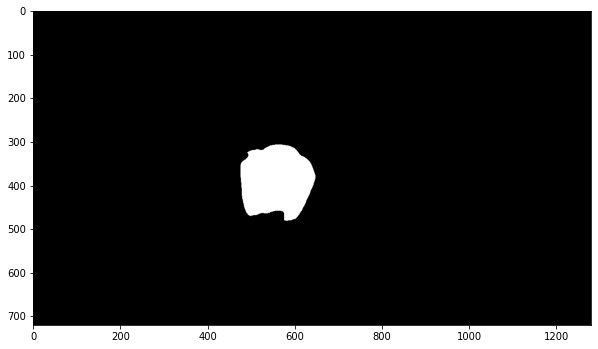

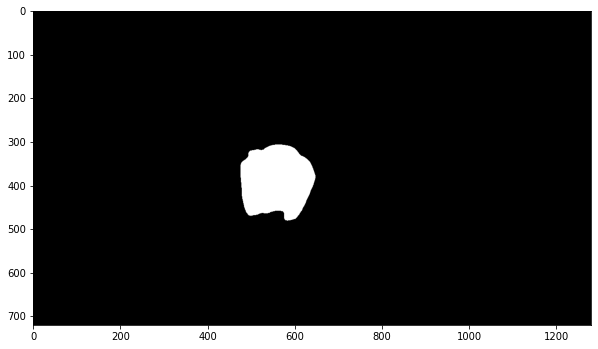

In [83]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_yel_closed = cv2.morphologyEx(image_yel, cv2.MORPH_CLOSE, kernel)
show_mask(image_yel_closed)

# Remove specks
image_yel_closed_then_opened = cv2.morphologyEx(image_yel_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_yel_closed_then_opened)

1


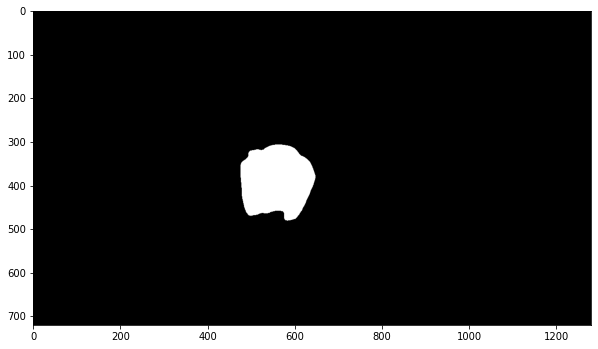

In [84]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, yel_mask = find_biggest_contour(image_yel_closed_then_opened)
show_mask(yel_mask)

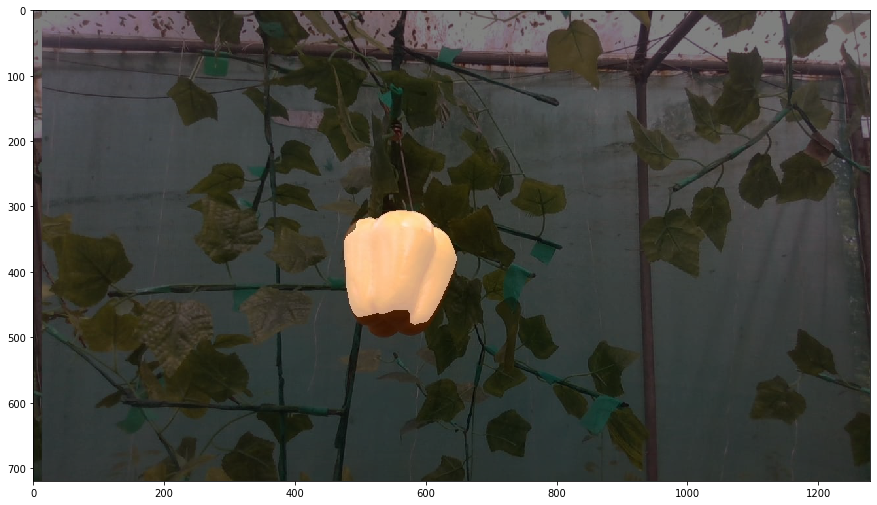

In [85]:
overlay_mask(yel_mask, image)

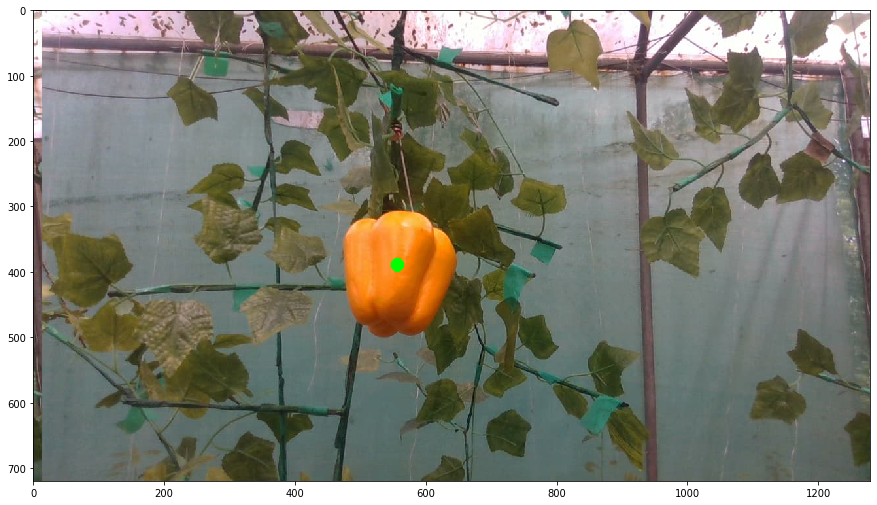

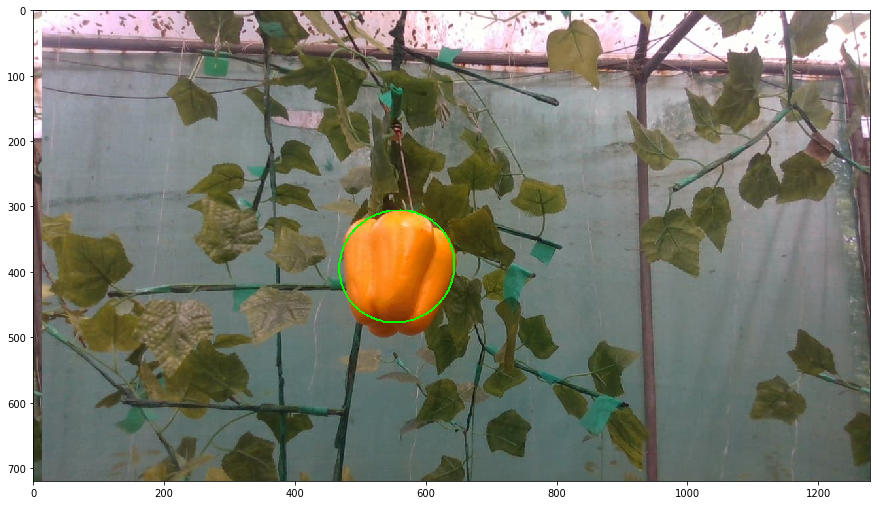

In [86]:
# Centre of mass
moments = cv2.moments(yel_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

In [88]:
# load the image
image = cv2.imread('new3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detect the bell pepper
centre_of_mass, ellipse = find_bell_pepper(image)
# draw the centroid
cv2.circle(image, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
# draw the bounding ellipse
cv2.ellipse(image, ellipse, (0,255,0), 2)
# show the image
show(image)

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
